КП № 6. РОЗВ’ЯЗАННЯ ЗАДАЧІ КОШІ МЕТОДАМИ РУНГЕ-КУТТА ТА АДАМСА $\\$
y = xtgx

In [594]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [595]:
F = lambda x: -x * (1- x **2) * np.tan(x) + np.tan(x) + x / np.cos(x) ** 2
f = lambda x, y: (1 - x**2) * y + F(x)
Y = lambda x:  np.tan(x) * x
h = 0.01
x0 = 0
X = np.arange(0, pi/2 - 0.01 , h)
n = len(X)
print(n)
Y = [np.tan(x) * x for x in X]
Y_rk4 = np.zeros(n)
Y_ab4 = np.zeros(n)

157


In [596]:
#RK4
def rk4(x, y, n, h, f):
    for i in range(n - 1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h/2, y[i] + (h * k1)/2)
        k3 = f(x[i] + h/2, y[i] + (h * k2)/2)
        k4 = f(x[i] + h, y[i] + h)

        y[i + 1] = y[i] + h * (k1 + 2*k2 + 2*k3 + k4) / 6

rk4(X, Y_rk4, n, h, f)

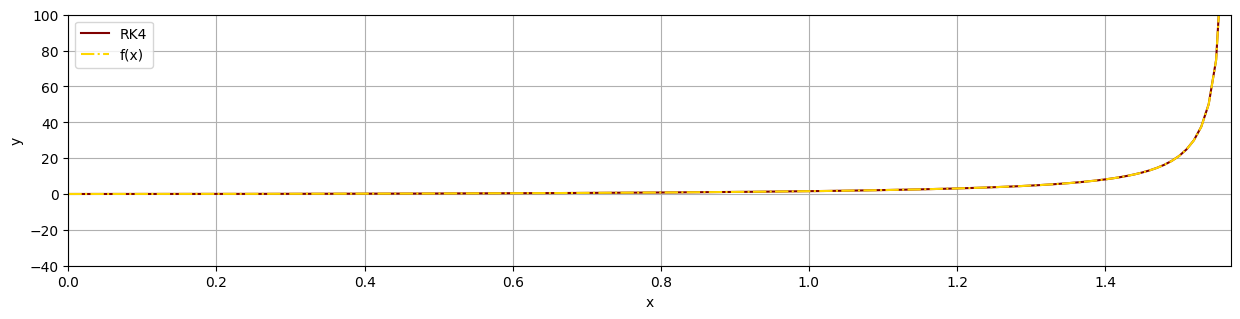

In [597]:
plt.figure(figsize=(15, 15))
plt.subplot(411)
plt.plot(X, Y_rk4, label='RK4', c = "maroon")
plt.plot(X, Y, label='f(x)', linestyle='-.', c = "gold")
plt.xlim(0, h*n)
plt.ylim(-40, 100)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

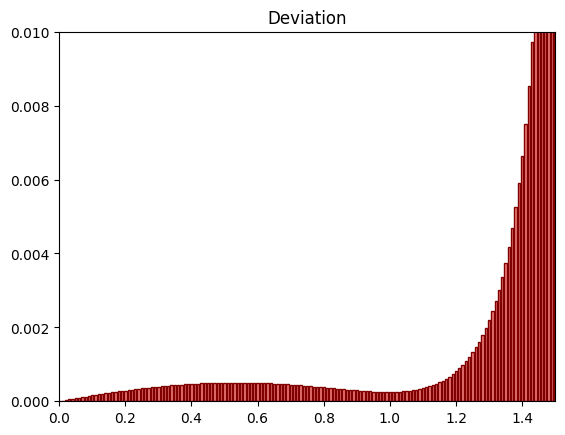

Середнє відхилення: 0.00974180473710659


In [598]:

plt.bar(X, np.abs(Y_rk4 - Y), color ='lightcoral', edgecolor = 'maroon',  width = 0.007)
plt.xlim(0, 1.5)
plt.ylim(0, 0.01)
plt.title("Deviation")
plt.show()
print(f"Середнє відхилення: {np.mean(np.abs(Y_rk4 - Y))}")

In [599]:
def AB4(x, y, n, h, f):
    for i in range(4): #обчислення перших 4-х кроків Евклідом
        y[i + 1] = y[i] + h * f(x[i], y[i])

    v = [55/24, -59/24, 37/24, -9/24]
    for i in range(4, n - 1):   
        y[i + 1] = y[i] + h * (v[0] * f(x[i], y[i]) + v[1] * f(x[i - 1], y[i - 1]) + v[2] * f(x[i - 2], y[i - 2]) + v[3] * f(x[i - 3], y[i - 3]))

AB4(X, Y_ab4, n, h, f)

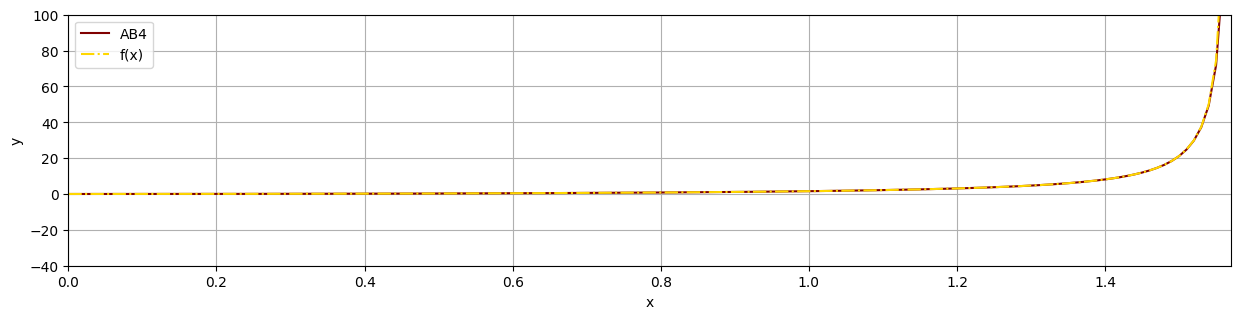

In [600]:
plt.figure(figsize=(15, 15))
plt.subplot(411)
plt.plot(X, Y_ab4, label='AB4', c = "maroon")
plt.plot(X, Y, label='f(x)', linestyle='-.', c = "gold")
plt.xlim(0, h*n)
plt.ylim(-40, 100)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

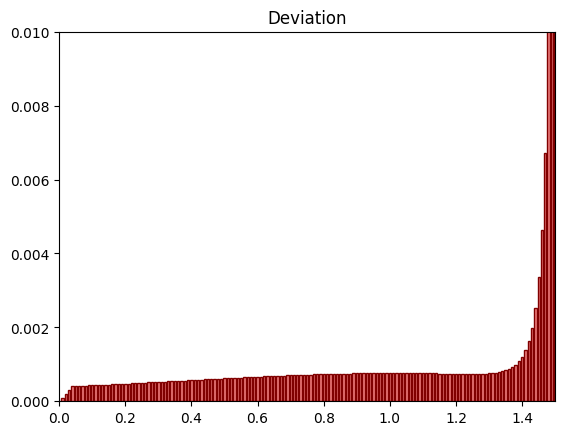

Середнє відхилення: 0.13859666347827898


In [601]:

plt.bar(X, np.abs(Y_ab4 - Y), color ='lightcoral', edgecolor = 'maroon',  width = 0.007)
plt.xlim(0, 1.5)
plt.ylim(0, 0.01)
plt.title("Deviation")
plt.show()
print(f"Середнє відхилення: {np.mean(np.abs(Y_ab4 - Y))}")